In [3]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

from lifelines.statistics import logrank_test

from sklearn.model_selection import KFold

---
## SMC_surv

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249

0.44284398875122455
0.3777447557361603
0.19825087994473276
0.15716633046379272
0.13318437939565358
0.020017584781253442
0.0016588282389757827
0.0011094597203785822


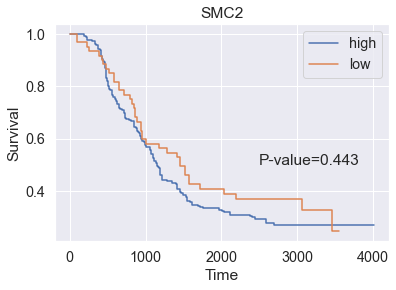

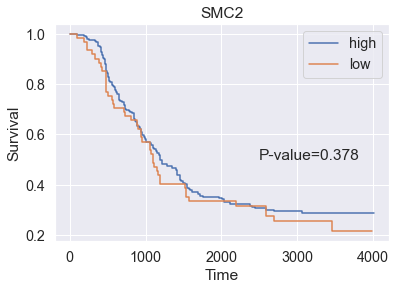

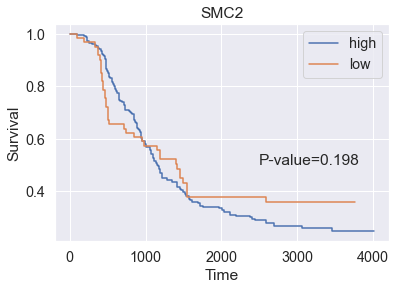

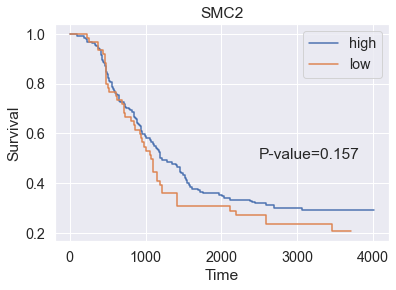

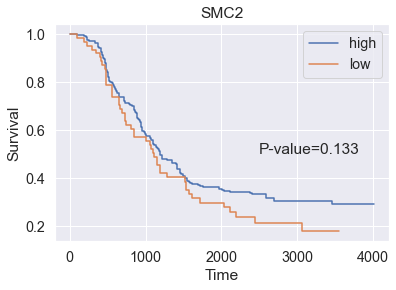

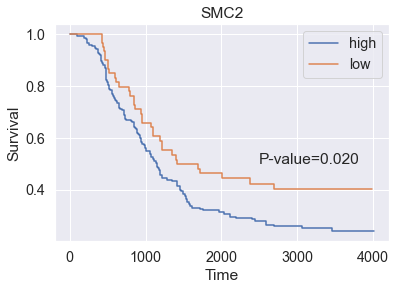

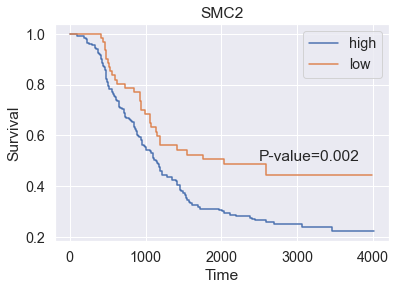

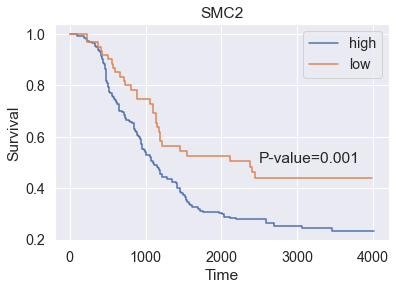

In [5]:
genes = ['SMC2']
opt_p=1

for target in genes:
    #data input
    table = pd.read_csv("./all_phase2_target_2018_pub_(pediatric)/all_phase2_target_2018_pub_clinical_data.csv")
    rna = pd.read_csv("./all_phase2_target_2018_pub_(pediatric)/data_expression_median.txt", sep = '\t', header = None).T

    rna.columns = rna.iloc[0,:]
    rna = rna[2:]
    rna.index = rna['Hugo_Symbol']
    rna = rna.iloc[:,1:]
    rna = np.log2(rna.astype('float64'))
    rna = rna.reset_index()

    table = pd.merge(table, rna, left_on = 'Sample ID', right_on = 'Hugo_Symbol')
    
    #converting data: vital_status >>> bool, days_to_birth >>> abs(int)
    table['Overall Survival Status'] = table['Overall Survival Status'] == 'DECEASED'
    table['Overall Survival Status'] = table['Overall Survival Status'].astype(int)
    table['Overall Survival Days'] = abs(table['Overall Survival Days'].astype(int))

    table = table.sort_values(["%s" %target], ascending=[False])
    table = table.reset_index(drop=True)

    table = table.loc[:,['Overall Survival Status', 'Overall Survival Days', "%s" %target]]    
    

############5-fold CV
    for seed in range(500):
        np.random.seed(seed)
        kf = KFold(n_splits=5, shuffle=True)

        X = table['SMC2']
        kf.get_n_splits(X)
        
        for train_index, test_index in kf.split(X):
            mask = X[train_index].index
            mask2 = X[test_index].index

            result = logrank_test(table['Overall Survival Status'][mask], table['Overall Survival Status'][mask2], table['Overall Survival Days'][mask], table['Overall Survival Days'][mask2])
            pvalue = result.p_value

            if(table['SMC2'][mask].mean() <= table['SMC2'][mask2].mean()):
                continue
            if(opt_p > pvalue):
                opt_p = pvalue
                print(opt_p)
            
            
                fig, ax = plt.subplots()

                kmf.fit(table['Overall Survival Days'][mask], table['Overall Survival Status'][mask], label='high')
                kmf.plot(ax=ax, ci_show=False)

                kmf.fit(table['Overall Survival Days'][mask2], table['Overall Survival Status'][mask2], label='low')
                kmf.plot(ax=ax, ci_show=False)

                ax.text(2500,0.5,'P-value=%.3f'% pvalue)

                table["%s" %target] = table["%s" %target] > table["%s" %target].mean()

                ax.set_xlabel('Time')
                ax.set_ylabel('Survival')
                ax.set_title('%s' %target)
                #plt.savefig('./%s_surv.png' %target, dpi=300, bbox_inches='tight')

0.006700287356211238
1.0684349457778198e-05


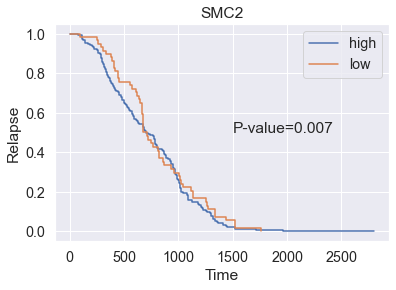

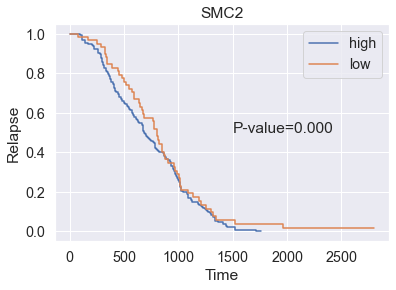

In [41]:
genes = ['SMC2']
opt_p=1

for target in genes:
    #data input
    table = pd.read_csv("./all_phase2_target_2018_pub_(pediatric)/all_phase2_target_2018_pub_clinical_data.csv")
    rna = pd.read_csv("./all_phase2_target_2018_pub_(pediatric)/data_expression_median.txt", sep = '\t', header = None).T

    rna.columns = rna.iloc[0,:]
    rna = rna[2:]
    rna.index = rna['Hugo_Symbol']
    rna = rna.iloc[:,1:]
    rna = np.log2(rna.astype('float64'))
    rna = rna.reset_index()

    table = pd.merge(table, rna, left_on = 'Sample ID', right_on = 'Hugo_Symbol')
    
    #converting data: vital_status >>> bool, days_to_birth >>> abs(int)
    table['First Event'] = table['First Event'] == 'Relapse'
    table['First Event'] = table['First Event'].astype(int)
    table['Time To Event (days)'] = abs(table['Time To Event (days)'].astype(int))

    table = table.sort_values(["%s" %target], ascending=[False])
    table = table.reset_index(drop=True)

    table = table.loc[:,['First Event', 'Time To Event (days)', "%s" %target]]    
    

############5-fold CV
    for seed in range(500):
        np.random.seed(seed)
        kf = KFold(n_splits=5, shuffle=True)

        X = table['SMC2']
        kf.get_n_splits(X)
        
        for train_index, test_index in kf.split(X):
            mask = X[train_index].index
            mask2 = X[test_index].index

            result = logrank_test(table['First Event'][mask], table['First Event'][mask2], table['Time To Event (days)'][mask], table['Time To Event (days)'][mask2])
            pvalue = result.p_value

            if(table['SMC2'][mask].mean() <= table['SMC2'][mask2].mean()):
                continue
            if(opt_p > pvalue):
                opt_p = pvalue
                print(opt_p)
            
            
                fig, ax = plt.subplots()

                kmf.fit(table['Time To Event (days)'][mask], table['First Event'][mask], label='high')
                kmf.plot(ax=ax, ci_show=False)

                kmf.fit(table['Time To Event (days)'][mask2], table['First Event'][mask2], label='low')
                kmf.plot(ax=ax, ci_show=False)

                ax.text(1500,0.5,'P-value=%.3f'% pvalue)

                table["%s" %target] = table["%s" %target] > table["%s" %target].mean()

                ax.set_xlabel('Time')
                ax.set_ylabel('Relapse')
                ax.set_title('%s' %target)
                plt.savefig('./%s_surv.png' %target, dpi=300, bbox_inches='tight')

---
## SMC_CD41(ITGA2B)_corr

In [40]:
table = pd.read_csv("./all_phase2_target_2018_pub_(pediatric)/all_phase2_target_2018_pub_clinical_data.csv")
rna = pd.read_csv("./all_phase2_target_2018_pub_(pediatric)/data_expression_median.txt", sep = '\t', header = None).T

rna.columns = rna.iloc[0,:]
rna = rna[2:]
rna.index = rna['Hugo_Symbol']
rna = rna.iloc[:,1:]
rna = np.log2(rna.astype('float64'))
rna = rna.reset_index()

table = pd.merge(table, rna, left_on = 'Sample ID', right_on = 'Hugo_Symbol')

rna = table.loc[:,'DDR1':]

rna.to_csv('./eset_target.csv', index=False)
rna = pd.read_csv('./eset_target.csv')

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249

In [114]:
#정규성 검정. p<0.05인 경우 정규성 만족하지 않는 것으로 봄
print(stats.shapiro(rna))
print(pearsonr(rna['SMC2'], rna['ITGA2B']))

(1.0040223598480225, 1.0)
(-0.16126971283985553, 0.00503689509059752)


C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


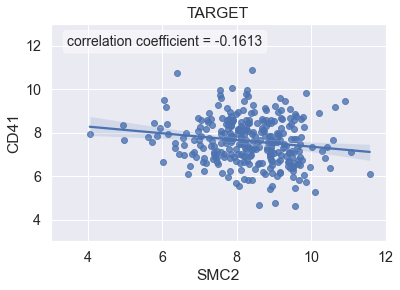

In [103]:
ax = sns.regplot(x = rna['SMC2'], y = rna['ITGA2B'])
ax.set(xlim=(3,12),ylim=(3,13),ylabel='CD41')
plt.title('TARGET')

ax.hist(0, 50)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

corr = (pearsonr(rna['SMC2'], rna['ITGA2B'])[0])
textstr = 'correlation coefficient = %.4f' %(corr)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.savefig('./TARGET_SMC2_CD41_corr.png', dpi=300, bbox_inches='tight')

In [104]:
rna = pd.read_csv('./13576_esets.csv', index_col=0).T

In [108]:
#정규성 검정. p<0.05인 경우 정규성 만족하지 않는 것으로 봄
print(stats.shapiro(rna))
print(spearmanr(rna['SMC2'].T.mean().T, rna['ITGA2B'].T.mean().T))

(0.9550772309303284, 0.0)
SpearmanrResult(correlation=-0.09066854198433145, pvalue=0.1916853987162202)


C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


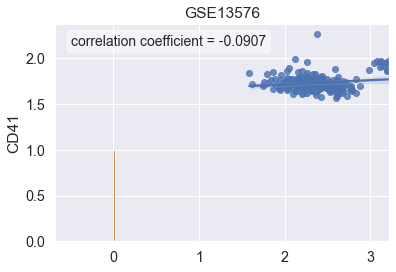

In [71]:
ax = sns.regplot(x = rna['SMC2'].T.mean().T, y = rna['ITGA2B'].T.mean().T)
ax.set(ylabel='CD41')
plt.title('GSE13576')

ax.hist(0, 50)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

corr = (spearmanr(rna['SMC2'].T.mean().T, rna['ITGA2B'].T.mean().T)[0])
textstr = 'correlation coefficient = %.4f' %(corr)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.savefig('./13576_SMC2_CD41_corr.png', dpi=300, bbox_inches='tight')

In [126]:
rna = pd.read_csv('./28460_esets.csv', index_col=0).T

In [127]:
#정규성 검정. p<0.05인 경우 정규성 만족하지 않는 것으로 봄
print(stats.shapiro(rna))
print(spearmanr(rna['SMC2'].T.mean().T, rna['ITGA2B'].T.mean().T))

(0.9322327375411987, 0.0)
SpearmanrResult(correlation=-0.21293728362947803, pvalue=0.035279806170579804)


C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


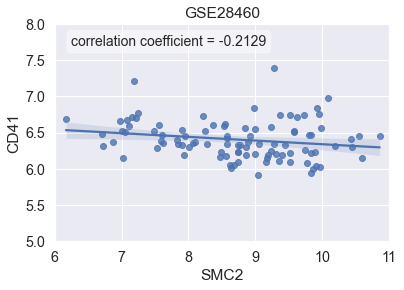

In [130]:
ax = sns.regplot(x = rna['SMC2'].T.mean().T, y = rna['ITGA2B'].T.mean().T)
ax.set(xlim=(6,11),ylim=(5,8),xlabel='SMC2',ylabel='CD41')
plt.title('GSE28460')

ax.hist(0, 50)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

corr = (spearmanr(rna['SMC2'].T.mean().T, rna['ITGA2B'].T.mean().T)[0])
textstr = 'correlation coefficient = %.4f' %(corr)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.savefig('./28460_SMC2_CD41_corr.png', dpi=300, bbox_inches='tight')

In [122]:
rna = pd.read_csv('./60926_esets.csv', index_col=0).T

In [123]:
#정규성 검정. p<0.05인 경우 정규성 만족하지 않는 것으로 봄
print(stats.shapiro(rna))
print(spearmanr(rna['SMC2'].T.mean().T, rna['ITGA2B'].T.mean().T))

(0.90440833568573, 0.0)
SpearmanrResult(correlation=-0.066890756302521, pvalue=0.6444088265071675)


C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
